# Script to plot average causal effects

This script loads sets of hundreds of causal traces that have been computed by the
`experiment.causal_trace` program, and then aggregates the results to compute
Average Indirect Effects and Average Total Effects as well as some other information.


In [59]:
import json  

knowns_data = json.load(open("../known_1000.json"))

display_modelname = "llama"

knowns_map = {k['known_id']:k for k in knowns_data}

In [60]:
knowns_map[0]

{'known_id': 0,
 'subject': 'Vinson Massif',
 'attribute': 'Antarctica',
 'template': '{} is located in the continent',
 'prediction': ' of Antarctica. It is the largest of the three',
 'prompt': 'Vinson Massif is located in the continent of',
 'relation_id': 'P30'}

In [61]:
from transformers import AutoTokenizer

In [62]:
display_modelname="llama"

In [63]:
def decode_tokens(tokenizer, token_array):
    if hasattr(token_array, "shape") and len(token_array.shape) > 1:
        return [decode_tokens(tokenizer, row) for row in token_array]
    return [tokenizer.decode([t]) for t in token_array]

def find_token_range(tokenizer, token_array, substring):
    toks = decode_tokens(tokenizer, token_array)
    # print(f"Rahul the display modelname is {display_modelname}")
    if display_modelname != 'phi':
        whole_string = tokenizer.decode(token_array).replace(' ', '')
        sub = substring.replace(' ', '')
    else:
        whole_string = ''.join(toks)
        sub = substring.strip() 
    char_loc = whole_string.rindex(sub)
    loc = 0
    tok_start, tok_end = None, None
    all_spans = []
    cur=0
    for i, t in enumerate(toks):
        loc += len(t)
        if tok_start is None and loc > char_loc:
            tok_start = i
        if tok_end is None and loc >= char_loc + len(sub):
            tok_end = i + 1
            cur+=1
            return tok_start, tok_end

In [64]:
tokenizer = AutoTokenizer.from_pretrained("/work/pi_dhruveshpate_umass_edu/rseetharaman_umass_edu/llama-2-7b-hf")

In [65]:
def get_subject_index(known_id, knowns_map):
    knowledge = knowns_map[known_id]
    subject = knowledge['subject']
    prompt = knowledge['prompt']
    print(prompt)
    inputs = tokenizer(prompt)['input_ids']
    print(len(inputs))
    s,e=find_token_range(tokenizer, inputs, subject)
    return s,e

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


Kingdom of Great Britain's capital,
9
The bounds are (5, 1)
The Jack Benny Program debuted on
9
The bounds are (6, 1)
Internet Explorer is developed by
6
The bounds are (3, 1)
The New Andy Griffith Show premieres on
10
The bounds are (7, 1)
Metropolitan France's capital,
7
The bounds are (3, 1)
Drew Brees plays in the position of
10
The bounds are (5, 1)
Luis del Sol plays as a striker, but he is also a
15
The bounds are (4, 1)
Antonio Sartorio is known for performing in the world's most prestigious
18
The bounds are (5, 1)
Thierry Henry professionally plays the sport of
11
The bounds are (5, 1)
The Biskitts was originally aired on the
12
The bounds are (6, 1)
Patrick Henry College is located in
7
The bounds are (4, 1)
Miyuki Sawashiro is originally from
11
The bounds are (8, 1)
Bhaktisiddhanta Saraswati, who has a citizenship of
18
The bounds are (11, 1)
Kyle Farnsworth plays in the position of the
12
The bounds are (6, 1)
Fantastic Fest can be found in the heart of downtown
14
The bo

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

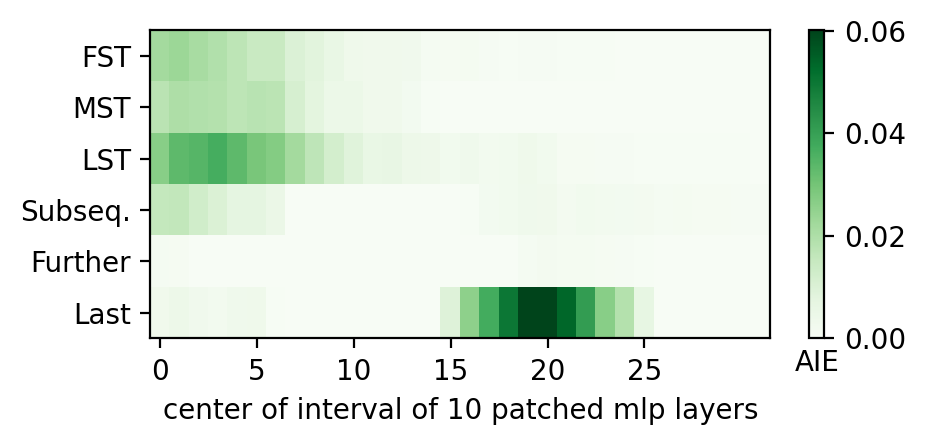

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


Kingdom of Great Britain's capital,
9
The bounds are (5, 1)
The Jack Benny Program debuted on
9
The bounds are (6, 1)
Internet Explorer is developed by
6
The bounds are (3, 1)
The New Andy Griffith Show premieres on
10
The bounds are (7, 1)
Metropolitan France's capital,
7
The bounds are (3, 1)
Drew Brees plays in the position of
10
The bounds are (5, 1)
Luis del Sol plays as a striker, but he is also a
15
The bounds are (4, 1)
Antonio Sartorio is known for performing in the world's most prestigious
18
The bounds are (5, 1)
Thierry Henry professionally plays the sport of
11
The bounds are (5, 1)
The Biskitts was originally aired on the
12
The bounds are (6, 1)
Patrick Henry College is located in
7
The bounds are (4, 1)
Miyuki Sawashiro is originally from
11
The bounds are (8, 1)
Bhaktisiddhanta Saraswati, who has a citizenship of
18
The bounds are (11, 1)
Kyle Farnsworth plays in the position of the
12
The bounds are (6, 1)
Fantastic Fest can be found in the heart of downtown
14
The bo

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

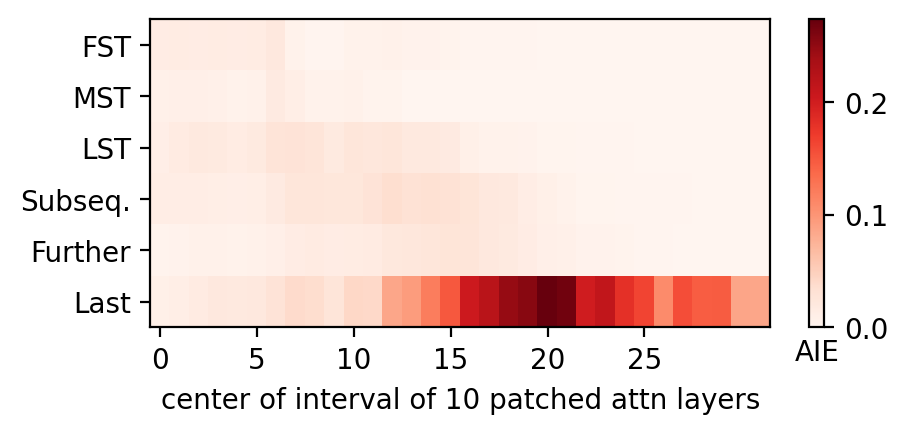

In [66]:
import numpy, os
from matplotlib import pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

from mpl_toolkits.axes_grid1 import make_axes_locatable


# Uncomment the architecture to plot.
arch = "llama"
archname = "llama-2"

# arch = 'EleutherAI_gpt-j-6B'
# archname = 'GPT-J-6B'

# arch = 'EleutherAI_gpt-neox-20b'
# archname = 'GPT-NeoX-20B'


class Avg:
    def __init__(self):
        self.d = []

    def add(self, v):
        self.d.append(v[None])

    def add_all(self, vv):
        self.d.append(vv)

    def avg(self):
        return numpy.concatenate(self.d).mean(axis=0)

    def std(self):
        return numpy.concatenate(self.d).std(axis=0)

    def size(self):
        return sum(datum.shape[0] for datum in self.d)


def read_knowlege(dirname, count=150, kind=None):
    kindcode = "" if not kind else f"_{kind}"
    (
        avg_fe,
        avg_ee,
        avg_le,
        avg_fa,
        avg_ea,
        avg_la,
        avg_hs,
        avg_ls,
        avg_fs,
        avg_fle,
        avg_fla,
    ) = [Avg() for _ in range(11)]
    files = os.listdir(dirname)
    files = [f for f in files if kindcode in f]
    import random
    if len(files) > 50:
        files = random.Random(42).sample(files, 50)
    for f in files:
        id_ = f.split("_")[1]
        try:
            data = numpy.load(f"{dirname}/{f}")
        except:
            continue
        # Only consider cases where the model begins with the correct prediction
        if "correct_prediction" in data and not data["correct_prediction"]:
            continue
        scores = data["scores"]
        known_id = int(f.split("_")[1])
        subject_start, subject_end = get_subject_index(known_id, knowns_map)
        first_e, first_a = subject_start, subject_end
        print(f"The bounds are {first_a, first_e}")
        last_e = first_a - 1
        last_a = len(scores) - 1
        # original prediction
        avg_hs.add(data["high_score"])
        # prediction after subject is corrupted
        avg_ls.add(data["low_score"])
        avg_fs.add(scores.max())
        # some maximum computations
        avg_fle.add(scores[last_e].max())
        avg_fla.add(scores[last_a].max())
        # First subject middle, last subjet.
        avg_fe.add(scores[first_e])
        avg_ee.add_all(scores[first_e + 1 : last_e])
        avg_le.add(scores[last_e])
        # First after, middle after, last after
        avg_fa.add(scores[first_a])
        avg_ea.add_all(scores[first_a + 1 : last_a])
        avg_la.add(scores[last_a])

    result = numpy.stack(
        [
            avg_fe.avg(),
            avg_ee.avg(),
            avg_le.avg(),
            avg_fa.avg(),
            avg_ea.avg(),
            avg_la.avg(),
        ]
    )
    result_std = numpy.stack(
        [
            avg_fe.std(),
            avg_ee.std(),
            avg_le.std(),
            avg_fa.std(),
            avg_ea.std(),
            avg_la.std(),
        ]
    )
    print("Average Total Effect", avg_hs.avg() - avg_ls.avg())
    print(
        "Best average indirect effect on last subject",
        avg_le.avg().max() - avg_ls.avg(),
    )
    print(
        "Best average indirect effect on last token", avg_la.avg().max() - avg_ls.avg()
    )
    print("Average best-fixed score", avg_fs.avg())
    print("Average best-fixed on last subject token score", avg_fle.avg())
    print("Average best-fixed on last word score", avg_fla.avg())
    print("Argmax at last subject token", numpy.argmax(avg_le.avg()))
    print("Max at last subject token", numpy.max(avg_le.avg()))
    print("Argmax at last prompt token", numpy.argmax(avg_la.avg()))
    print("Max at last prompt token", numpy.max(avg_la.avg()))
    return dict(
        low_score=avg_ls.avg(), result=result, result_std=result_std, size=avg_fe.size()
    )


def plot_array(
    differences,
    kind=None,
    savepdf=None,
    title=None,
    low_score=None,
    high_score=None,
    archname="GPT2-XL",
):
    if low_score is None:
        low_score = differences.min()
    if high_score is None:
        high_score = differences.max()
    answer = "AIE"
    labels = [
        "FST",
        "MST",
        "LST",
        "Subseq.",
        "Further",
        "Last",
    ]

    fig, ax = plt.subplots(figsize=(5, 2), dpi=200)

    h = ax.pcolor(
        differences,
        cmap={None: "Purples", "mlp": "Greens", "attn": "Reds"}[kind],
        vmin=low_score,
        vmax=high_score,
    )
    # if title:
    #     ax.set_title(title)
    ax.invert_yaxis()
    ax.set_yticks([0.5 + i for i in range(len(differences))])
    ax.set_xticks([0.5 + i for i in range(0, differences.shape[1] - 6, 5)])
    ax.set_xticklabels(list(range(0, differences.shape[1] - 6, 5)))
    ax.set_yticklabels(labels)
    if kind is None:
        ax.set_xlabel(f"single patched layer within {archname}")
    else:
        ax.set_xlabel(f"center of interval of 10 patched {kind} layers")
    cb = plt.colorbar(h)
    # The following should be cb.ax.set_xlabel(answer), but this is broken in matplotlib 3.5.1.
    if answer:
        cb.ax.set_title(str(answer).strip(), y=-0.16, fontsize=10)

    if low_score is None:
        low_score = differences.min()
    if high_score is None:
        high_score = differences.max()
    answer = "AIE"
    labels = [
        "FST",
        "MST",
        "LST",
        "F Subseq T",
        "Further tokens",
        "Last token",
    ]

    if savepdf:
        os.makedirs(os.path.dirname(savepdf), exist_ok=True)
        plt.savefig(savepdf, bbox_inches="tight")
    plt.show()


the_count = 1208
high_score = None  # Scale all plots according to the y axis of the first plot

import pickle
phi_ids = pickle.load(open("known_ids_phi.pkl", "rb"))

for kind in ["mlp", "attn"]:
    dirname = f"/work/pi_dhruveshpate_umass_edu/rseetharaman_umass_edu/knowledge-perception/rome/results-rerun/{arch}_knowns/cases"
    d = read_knowlege(dirname, the_count, kind)
    count = d["size"]
    what = {
        None: "Indirect Effect of $h_i^{(l)}$",
        "mlp": "Indirect Effect of MLP",
        "attn": "Indirect Effect of Attn",
    }[kind]
    title = f"Avg {what} over {count} prompts"
    result = numpy.clip(d["result"] - d["low_score"], 0, None)
    kindcode = "" if kind is None else f"_{kind}"
    if kind not in ["mlp", "attn"]:
        high_score = result.max()

    plot_array(
        result,
        kind=kind,
        title=title,
        low_score=0.0,
        high_score=high_score,
        archname=archname,
        savepdf=f"results/{arch}/causal_trace/summary_pdfs/rollup{kindcode}.pdf",
    )

In [22]:
input_ids = tokenizer("The native language of Edward Bulwer-Lytton is")['input_ids']
subject = "Edward Bulwer-Lytton"
find_token_range(tokenizer, input_ids, subject)

(4, 11)

In [23]:
len(input_ids)

12

In [23]:
tokenizer.decode(input_ids[5:13])

'Edward Bulwer-Lytton'

## Plot line graph

To make confidence intervals visible, we plot the data as line graphs below.

Reading None
Average Total Effect 0.6905104947905755
Best average indirect effect on last subject 0.0017557853530859695
Best average indirect effect on last token 0.22202889450599905
Average best-fixed score 0.26896805
Average best-fixed on last subject token score 0.026138892
Average best-fixed on last word score 0.26706448
Argmax at last subject token 0
Max at last subject token 0.021306066
Argmax at last prompt token 23
Max at last prompt token 0.24157917
Reading mlp


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


Average Total Effect 0.6927324380624514
Best average indirect effect on last subject 0.0005208715695362923
Best average indirect effect on last token 0.025243833278439605
Average best-fixed score 0.05948773
Average best-fixed on last subject token score 0.022750616
Average best-fixed on last word score 0.056508865
Argmax at last subject token 19
Max at last subject token 0.020071032
Argmax at last prompt token 23
Max at last prompt token 0.044793993
Reading attn
Average Total Effect 0.6882886111233443
Best average indirect effect on last subject 0.0040389734748810385
Best average indirect effect on last token 0.41881389612891373
Average best-fixed score 0.4784483
Average best-fixed on last subject token score 0.029527169
Average best-fixed on last word score 0.47762007
Argmax at last subject token 0
Max at last subject token 0.023589374
Argmax at last prompt token 23
Max at last prompt token 0.4383643


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

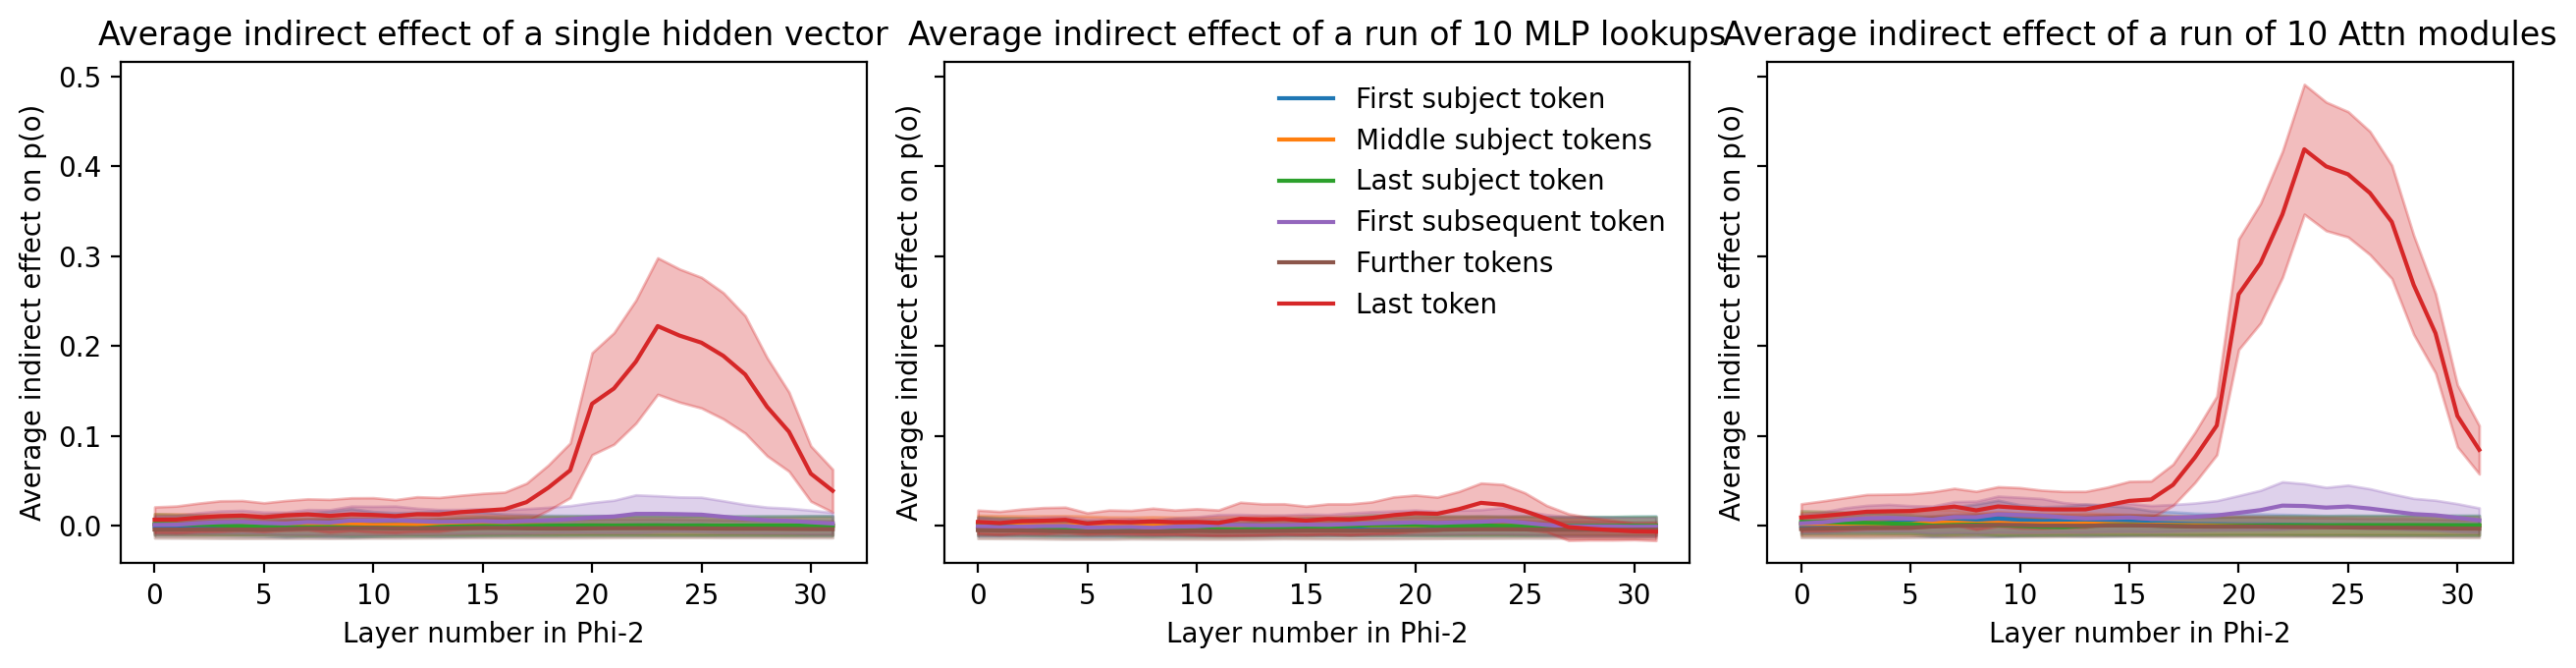

In [37]:
import math

labels = [
    "First subject token",
    "Middle subject tokens",
    "Last subject token",
    "First subsequent token",
    "Further tokens",
    "Last token",
]
color_order = [0, 1, 2, 4, 5, 3]
x = None

cmap = plt.get_cmap("tab10")
fig, axes = plt.subplots(1, 3, figsize=(13, 3.5), sharey=True, dpi=200)
for j, (kind, title) in enumerate(
    [
        (None, "single hidden vector"),
        ("mlp", "run of 10 MLP lookups"),
        ("attn", "run of 10 Attn modules"),
    ]
):
    print(f"Reading {kind}")
    d = read_knowlege(225, kind, arch)
    for i, label in list(enumerate(labels)):
        y = d["result"][i] - d["low_score"]
        if x is None:
            x = list(range(len(y)))
        std = d["result_std"][i]
        error = std * 1.96 / math.sqrt(count)
        axes[j].fill_between(
            x, y - error, y + error, alpha=0.3, color=cmap.colors[color_order[i]]
        )
        axes[j].plot(x, y, label=label, color=cmap.colors[color_order[i]])

    axes[j].set_title(f"Average indirect effect of a {title}")
    axes[j].set_ylabel("Average indirect effect on p(o)")
    axes[j].set_xlabel(f"Layer number in {archname}")
    # axes[j].set_ylim(0.1, 0.3)
axes[1].legend(frameon=False)
plt.tight_layout()
plt.savefig(f"results/{arch}/causal_trace/summary_pdfs/lineplot-causaltrace.pdf")
plt.show()